In [1760]:
import os, os.path
import numpy as np
import pandas as pd
import model_attributes as ma
from attribute_table import AttributeTable
import model_afolu as mafl
import model_circular_economy as mc
from model_socioeconomic import Socioeconomic
import setup_analysis as sa
import support_functions as sf
import importlib
import time
import warnings
import matplotlib.pyplot as plt
importlib.reload(ma)
importlib.reload(sa)
importlib.reload(sf)
importlib.reload(mafl)




/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/data_structures.py:541: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/data_structures.py:541: UserWarning: Invalid subsector attribute 'key_varreqs_all'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/data_structures.py:541: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector'
  warnings.warn(f"Invalid subsec

<module 'model_afolu' from '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_afolu.py'>

In [1676]:
sa.model_attributes.configuration.get("historical_back_proj_n_periods")


10

In [1764]:
df_complete = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_complete.csv"))
df_waste = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_circular_economy.csv"))
df_socio = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_socioeconomic.csv"))
model_afolu = mafl.AFOLU(sa.model_attributes);
df_project_afolu = model_afolu.project(df_complete)
# pass integrated df
df_waste_integrated = pd.merge(df_complete, df_project_afolu)

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/data_structures.py:541: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_afolu.py:336: RuntimeWarning: divide by zero encountered in true_divide
  vec_lvst_cc_init = vec_lvst_pop_init/(vec_initial_area[ind_pstr]*vec_lvst_pstr_weights)
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_afolu.py:373: RuntimeWarning: invalid value encountered in multiply
  vec_lvst_prod_proj = vec_lvst_cc_proj*area_pstr_proj*vec_lvst_pstr_weights
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/data_structures.py:541: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type

In [1773]:
#importlib.reload(ma)
#importlib.reload(sa)
importlib.reload(sf)
class CircularEconomy:

    def __init__(self, attributes: ma.ModelAttributes):

        self.model_attributes = attributes
        self.required_dimensions = self.get_required_dimensions()
        self.required_subsectors, self.required_base_subsectors = self.get_required_subsectors()
        self.required_variables, self.output_variables = self.get_ce_input_output_fields()
        self.required_variables_wali, self.output_variables_wali = self.get_ce_input_output_fields([x for x in self.required_subsectors if (x != "Solid Waste")])

        ##  set some model fields to connect to the attribute tables

        # liquid waste model variables
        self.modvar_wali_bod_correction = "BOD Correction Factor for TOW"
        self.modvar_wali_bod_per_capita = "BOD per Capita"
        self.modvar_wali_cod_per_gdp = "COD per GDP"
        self.modvar_wali_frac_nitrogen_removed_in_treatment = "Nitrogen Treatment Removal Fraction"
        self.modvar_wali_frac_protein_with_red_meat = "Fraction of Protein in Diet with Red Meat"
        self.modvar_wali_frac_protein_without_red_meat = "Fraction of Protein in Diet without Red Meat"
        self.modvar_wali_init_pcap_wwgen = "Initial Per Capita Annual Domestic Wastewater Generated"
        self.modvar_wali_init_pgdp_wwgen = "Initial Per GDP Annual Industrial Wastewater Generated"
        self.modvar_wali_logelast_ww_to_gdppc = "Log Elasticity DWW Production to GDP Per Capita"
        self.modvar_wali_max_bod_capac = "Maximum BOD :math:\\text{CH}_4 Producing Capacity"
        self.modvar_wali_max_cod_capac = "Maximum COD :math:\\text{CH}_4 Producing Capacity"
        self.modvar_wali_nitrogen_density_ww_ind = "Nitrogen Density of Industrial Wastewater"
        self.modvar_wali_optional_elasticity_protein_to_gdppc = "(Optional) Elasticity of Protein in Diet to GDP per Capita"
        self.modvar_wali_param_fnoncon = "Factor for Nitrogen in Non-Consumed Protein Disposed in Sewer System"
        self.modvar_wali_param_nhh = "Scalar to Account for Nitrogen in Household Products"
        self.modvar_wali_protein_per_capita = "Average Protein Consumption Per Capita"
        self.modvar_wali_treatpath_aerobic = "Treatment Fraction Aerobic"
        self.modvar_wali_treatpath_anaerobic = "Treatment Fraction Anaerobic"
        self.modvar_wali_treatpath_septic = "Treatment Fraction Septic"
        self.modvar_wali_treatpath_latrine_improved = "Treatment Fraction Improved Latrine"
        self.modvar_wali_treatpath_latrine_unimproved = "Treatment Fraction Unimproved Latrine"
        self.modvar_wali_treatpath_untreated_no_sewerage = "Treatment Fraction Untreated No Sewerage"
        self.modvar_wali_treatpath_untreated_with_sewerage = "Treatment Fraction Untreated With Sewerage"
        
        # domestic solid waste model variables
        self.modvar_waso_annual_vkmt_per_collection_vehicle = "Average VKMT Per Waste Collection Vehicle"
        self.modvar_waso_annual_waste_collected_per_collection_vehicle = "Average Annual Waste Transported Per Waste Collection Vehicle"
        self.modvar_waso_composition_isw = "Initial Composition Fraction Industrial Solid Waste"
        self.modvar_waso_ef_ch4_biogas = ":math:\\text{CH}_4 Anaerobic Biogas Emission Factor"
        self.modvar_waso_ef_ch4_compost = ":math:\\text{CH}_4 Composting Emission Factor"
        self.modvar_waso_ef_ch4_incineration_isw = ":math:\\text{CH}_4 ISW Incineration Emission Factor"
        self.modvar_waso_ef_ch4_incineration_msw = ":math:\\text{CH}_4 MSW Incineration Emission Factor"
        self.modvar_waso_ef_n2o_compost = ":math:\\text{N}_2\\text{O} Composting Emission Factor"
        self.modvar_waso_ef_n2o_incineration = ":math:\\text{N}_2\\text{O} Incineration Emission Factor"
        self.modvar_waso_elast_msw = "Elasticity of Municipal Solid Waste Produced to GDP per Capita"
        self.modvar_waso_emissions_ch4_biogas = ":math:\\text{CH}_4 Emissions from Anaerobic Biogas"
        self.modvar_waso_emissions_ch4_compost = ":math:\\text{CH}_4 Emissions from Composting"
        self.modvar_waso_emissions_ch4_incineration = ":math:\\text{CH}_4 Emissions from Incineration"
        self.modvar_waso_emissions_ch4_landfill = ":math:\\text{CH}_4 Emissions from Landfills"
        self.modvar_waso_emissions_ch4_open_dump = ":math:\\text{CH}_4 Emissions from Open Dumping"
        self.modvar_waso_emissions_co2_incineration = ":math:\\text{CO}_2 Emissions from Incineration"
        self.modvar_waso_emissions_n2o_compost = ":math:\\text{N}_2\\text{O} Emissions from Composting"
        self.modvar_waso_emissions_n2o_incineration = ":math:\\text{N}_2\\text{O} Emissions from Incineration"
        self.modvar_waso_frac_ch4_flared_composting = "Fraction of Methane Flared at Composting Facilities"
        self.modvar_waso_frac_biogas = "Fraction of Waste Treated Anaerobically"
        self.modvar_waso_frac_compost = "Fraction of Waste Composted"
        self.modvar_waso_frac_landfill_gas_ch4_to_energy = "Fraction of Landfill Gas Recovered for Energy"
        self.modvar_waso_frac_nonrecycled_incineration = "Fraction of Non-Recycled Solid Waste Incinerated"
        self.modvar_waso_frac_nonrecycled_landfill = "Fraction of Non-Recycled Solid Waste Landfilled"
        self.modvar_waso_frac_nonrecycled_opendump = "Fraction of Non-Recycled Solid Waste Open Dumps"
        self.modvar_waso_frac_recovered_for_energy_incineration_isw = "Fraction of ISW Incineration Recovered for Energy"
        self.modvar_waso_frac_recovered_for_energy_incineration_msw = "Fraction of MSW Incineration Recovered for Energy"
        self.modvar_waso_frac_recycled = "Fraction of Waste Recycled"
        self.modvar_waso_historical_bp_grp = "Historical Back Projection Growth Rate in Solid Waste Generation"
        self.modvar_waso_init_composition_msw = "Initial Composition Fraction Municipal Solid Waste"
        self.modvar_waso_init_isw_generated_pgdp = "Per GDP Industrial Solid Waste Generated"
        self.modvar_waso_init_msw_generated_pc = "Initial Per Capita Municipal Solid Waste Generated"
        self.modvar_waso_mcf_landfills_average = "Average Methane Correction Factor at Landfills"
        self.modvar_waso_mcf_open_dumping_average = "Average Methane Correction Factor for Open Dumping"
        self.modvar_waso_oxf_landfills = "Average Oxidization Factor at Landfills"
        self.modvar_waso_physparam_k = "K"
        self.modvar_waso_recovered_biogas = "Biogas Recovered from Anaerobic Facilities"
        self.modvar_waso_recovered_ch4_landfill_gas = ":math:\\text{CH}_4 Recovered from Landfill Gas"
        self.modvar_waso_rf_biogas = "Biogas Recovery Factor"
        self.modvar_waso_rf_landfill_gas_recovered = "Fraction of Landfill Gas Recovered at Landfills"
        self.modvar_waso_rf_landfill_gas_to_ch4 = ":math:\\text{CH}_4 Recovery Factor Landfill Gas"
        self.modvar_waso_waste_per_capita_scalar = "Waste Per Capita Scale Factor"
        self.modvar_waso_waste_total_biogas = "Total Waste Anaerobic Biogas"
        self.modvar_waso_waste_total_compost = "Total Waste Composted"
        self.modvar_waso_waste_total_for_energy_isw = "Total ISW Recovered for Energy"
        self.modvar_waso_waste_total_for_energy_msw = "Total MSW Recovered for Energy"
        self.modvar_waso_waste_total_incineration = "Total Waste Incinerated"
        self.modvar_waso_waste_total_produced = "Total Solid Waste Produced"
        self.modvar_waso_waste_total_landfilled = "Total Waste Landfilled"
        self.modvar_waso_waste_total_open_dumped = "Total Waste Open Dumped"
        self.modvar_waso_waste_total_recycled = "Total Waste Recycled"
        
        # wastewater treatment
        self.modvar_trww_ef_n2o_wastewater_treatment = ":math:\\text{N}_2\\text{O} Wastewater Treatment Emission Factor"
        self.modvar_trww_emissions_ch4_treatment = ":math:\\text{CH}_4 Emissions from Wastewater Treatment"
        self.modvar_trww_emissions_n2o_treatment = ":math:\\text{N}_2\\text{O} Emissions from Wastewater Treatment"
        self.modvar_trww_emissions_n2o_effluent = ":math:\\text{N}_2\\text{O} Emissions from Wastewater Effluent"
        self.modvar_trww_frac_tow_removed = "Fraction of Total Organic Waste Removed"
        self.modvar_trww_krem = ":math:\\text{K}_{REM} Sludge Factor"
        self.modvar_trww_mcf = "Methane Correction Factor"
        self.modvar_trww_septic_sludge_compliance = "Septic Sludge Compliance Fraction"
        self.modvar_trww_sludge_produced = "Mass of Sludge Produced"
        self.modvar_trww_total_bod_treated = "Total BOD Treated"
        self.modvar_trww_total_cod_treated = "Total COD Treated"
        self.modvar_trww_total_tow_bod_in_effluent = "Total BOD Organic Waste in Effluent"
        self.modvar_trww_total_tow_cod_in_effluent = "Total COD Organic Waste in Effluent"
        self.modvar_trww_vol_ww_treated = "Volume of Wastewater Treated"
        
        # other sectors' variables, used in integration
        self.modvar_lvst_net_imports = "Change to Net Imports of Livestock"
        self.modvar_lvst_pop = "Livestock Head Count"
        

        ##  MISCELLANEOUS VARIABLES

        self.time_periods, self.n_time_periods = self.model_attributes.get_time_periods()
        self.vars_wali_to_trww = self.model_attributes.get_ordered_vars_by_nonprimary_category("Liquid Waste", "Wastewater Treatment", "key_varreqs_all")

        # TEMP:SET TO DERIVE FROM ATTRIBUTE TABLES AND/OR CONFIGURATION FILE---
        self.landfill_gas_frac_methane = 0.5
        # SET TO READ FROM CONFIGURATION FILE
        self.back_projection_number_of_time_steps = 10
        self.back_projection_number_periods_for_average_growth = 10
        
        # fraction of protein composed of nitrogen
        self.factor_f_npr = 0.16
        self.factor_n2on_to_n2o = float(11/7)
        self.factor_c_to_co2 = float(11/3)
        self.factor_molecular_weight_ch4 = float(4/3)
        
        # add socioeconomic
        self.model_socioeconomic = Socioeconomic(self.model_attributes)
        
        


    ##  FUNCTIONS FOR MODEL ATTRIBUTE DIMENSIONS

    def check_df_fields(self, df_ce_trajectories, check_fields = None):
        if check_fields == None:
            check_fields = self.required_variables
        # check for required variables
        if not set(check_fields).issubset(df_ce_trajectories.columns):
            set_missing = list(set(check_fields) - set(df_ce_trajectories.columns))
            set_missing = sf.format_print_list(set_missing)
            raise KeyError(f"Circular Economy projection cannot proceed: The fields {set_missing} are missing.")


    def get_required_subsectors(self):
        subsectors = list(sf.subset_df(self.model_attributes.dict_attributes["abbreviation_subsector"].table, {"sector": ["Circular Economy"]})["subsector"])
        subsectors_base = subsectors.copy()
        subsectors += ["Economy", "General"]
        return subsectors, subsectors_base

    def get_required_dimensions(self):
        ## TEMPORARY - derive from attributes later
        required_doa = [self.model_attributes.dim_time_period]
        return required_doa

    def get_ce_input_output_fields(self, subsectors = None):
        if subsectors == None:
            subsectors = self.required_subsectors
        required_doa = [self.model_attributes.dim_time_period]
        required_vars, output_vars = self.model_attributes.get_input_output_fields(subsectors)
        return required_vars + self.get_required_dimensions(), output_vars

    
    
    
    #####################################
    ###                               ###
    ###    PRIMARY MODEL FUNCTIONS    ###
    ###                               ###
    #####################################
    
    ##  first order decay model
    def fod(self,
        array_waso_waste: np.ndarray,
        vec_ddocm_factors: np.ndarray,
        array_k: np.ndarray,
        vec_mcf: np.ndarray,
        vec_oxf: np.ndarray = 0.0,
        vec_frac_captured: np.ndarray = 0.0
    ):
        """
            array_waso_waste: array of solid waste mass by category 

            vec_ddocm_factors: vector (by category, or column-wise) of DDOCm factors (DOC*DOCf) by waste category 

            array_k: array (same shape as array_waso_waste) or vector (by category, or column-wise) of methane generation rates k. If a vector, k will be assumed to be constant for all time periods.g

            vec_mcf: vector (by period, or row-wise) or scalar of methane correction values by time period (len should be same as array_waso_waste)

            vec_oxf: vector (by period, or row-wise) or scalar of oxidisation factors. Should not exceed 0.1. Default is 0.
        """

        # check shapes
        if len(array_waso_waste.shape) == 1:
            array_waso_waste = np.array([array_waso_waste]).transpose()
        elif len(array_waso_waste.shape) != 2:
            raise ValueError(f"Error in FOD: array_waso_waste should be a two dimensional array (rows are time periods, columns are categories)")
        if len(array_k.shape) == 1:
            if len(array_k) != array_waso_waste.shape[1]:
                raise ValueError(f"Error in FOD: array_k does not have the same number of categories as array_waso_waste.")
        elif len(array_k.shape) == 2:
            if array_k.shape != array_waso_waste.shape:
                raise ValueError(f"Error in FOD: incompatible array specification of array_k (shape '{array_k.shape}'). It should have shape '{array_waso_waste.shape}'")
        elif len(vec_ddocm_factors) != array_waso_waste.shape[1]:
                raise ValueError(f"Error in FOD: vec_ddocm_factors does not have the same number of categories as array_waso_waste.")
        elif len(vec_mcf) != array_waso_waste.shape[0]:
                raise ValueError(f"Error in FOD: vec_mcf does not have the same time periods as array_waso_waste.")
        elif (type(vec_oxf) == np.ndarray) & (len(vec_oxf) != array_waso_waste.shape[0]):
            raise ValueError(f"Error in FOD: vec_oxf does not have the same time periods as array_waso_waste.")
        elif (type(vec_frac_captured) == np.ndarray) & (len(vec_frac_captured) != array_waso_waste.shape[0]):
            raise ValueError(f"Error in FOD: vec_frac_captured does not have the same time periods as array_waso_waste.")

        # start building output array
        if len(array_k.shape) == 1:
            array_k = np.repeat([array_k], len(array_waso_waste), axis = 0)

        # initialize arrays for FOD model
        m, n = array_waso_waste.shape
        array_ddocm_accumulated = np.zeros(array_waso_waste.shape)
        array_ddocm_decomposed = np.zeros(array_waso_waste.shape)
        np.put(array_ddocm_accumulated, np.arange(0, len(array_ddocm_accumulated[0])), array_waso_waste[0])

        # loop to update arrays
        for i in range(1, len(array_waso_waste)):
            # use k from the previous time step if k changes (e.g., due to climate change); it represents that decay factor for waste deposited during that year
            vec_k = np.exp(-array_k[i - 1])
            vec_ddocm_accumulated_cur = array_waso_waste[i] + array_ddocm_accumulated[i - 1]*vec_k
            vec_ddocm_decomposed_cur = array_ddocm_accumulated[i - 1]*(1 - vec_k)
            # update arrays with accumulated and decomposed waste
            inds = i*n + np.arange(0, n)
            np.put(array_ddocm_accumulated, inds, vec_ddocm_accumulated_cur)
            np.put(array_ddocm_decomposed, inds, vec_ddocm_decomposed_cur)

        # adjust for recovery + oxidisation
        array_ch4_total = array_ddocm_decomposed*self.factor_molecular_weight_ch4*self.landfill_gas_frac_methane
        array_ch4_captured = (array_ch4_total.transpose()*vec_frac_captured).transpose()
        array_ch4_total -= array_ch4_captured
        array_ch4_total = (array_ch4_total.transpose()*(1 - vec_oxf)).transpose()
        vec_ch4_recovered = np.sum(array_ch4_captured, axis = 1)
    
        return array_ch4_total, vec_ch4_recovered
        
    
    ##  function to retrieve historical solid waste data. Valid methods are "back_project" (default) and historical (under construction, but designed to read from a file)
    def get_historical_solid_waste(self, 
            array: np.ndarray = None, 
            method: str = None, 
            n_periods: int = 10,
            bp_gr: float = None
        ) -> np.ndarray:
            
            """
                use get_waste_historical to obtain the historical data for solid waste disposal.
                
                array: optional. If method == "back_project", this array is used to back project waste. Can be set to None if using historical
                
                method: "back_project" or "historical". Default is set in the configuration file. 
                
                n_periods: number of periods to use in the back_project method. Reset if using historical. 
                
                n_gr_periods: number of periods in back_project method used to estimate growth rate.
                
            """
            # retrieve methods
            if type(method) == type(None):
                method = self.model_attributes.configuration.get("historical_solid_waste_method")
            # check specification
            if method not in self.model_attributes.configuration.valid_historical_solid_waste_method:
                valid_vals = sf.format_print_list(self.model_attributes.configuration.valid_historical_solid_waste_method)
                raise ValueError(f"Invalid specification of historical waste retrieval method '{method}': Method not found. Valid values are {valid_vals}.")
            
            # get
            if method == "back_project":
                
                if type(array) != np.ndarray:
                    raise ValueError("Error: specify an array to use for back projection.")
                if type(bp_gr) == type(None):
                    raise ValueError("Error: specify a back projection growth rate.")
                if type(n_periods) != int:
                    raise ValueError("Error: specify a number of periods to project solid waste backwards.")
                    
                array_bp = sf.back_project_array(array, n_periods, bp_gr)
                inds_hist = np.arange(0, n_periods)
                inds_model = np.arange(n_periods, n_periods + len(array))
                return inds_hist, inds_model, np.concatenate([array_bp, array])
                
            elif method == "historical":
                """
                    ADD HISTORICAL APPROACH HERE
                """
                raise ValueError("Historical approach to get_waste_historical currecntly undefined. Use 'back_project' until completed.")
                
                
    
    ##  project protein consumption
    def project_protein_consumption(self, df_ce_trajectories: pd.DataFrame, vec_pop: np.ndarray, vec_rates_gdp_per_capita: np.ndarray = None) -> np.array:
        """
            Projects protein consumption (in kg) based on livestock growth, or, if not integrated, a specified elasticity
        """
        # get scalar that represents the impact of a reduction of protein in the vegetarian diet
        vec_wali_frac_protein_in_diet_with_rm = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_wali_frac_protein_with_red_meat, True, return_type = "array_base")
        vec_wali_frac_protein_in_diet_without_rm = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_wali_frac_protein_without_red_meat, True, return_type = "array_base")
        vec_wali_protein_scalar_no_rm = vec_wali_frac_protein_in_diet_without_rm/vec_wali_frac_protein_in_diet_with_rm
        vec_gnrl_frac_eating_red_meat = self.model_attributes.get_standard_variables(df_ce_trajectories, self.model_socioeconomic.modvar_gnrl_frac_eating_red_meat, True, return_type = "array_base", var_bounds = (0, 1))
        vec_wali_protein_scalar = (vec_gnrl_frac_eating_red_meat + vec_wali_protein_scalar_no_rm*(1 - vec_gnrl_frac_eating_red_meat)).flatten()
        # get protein consumed per person in kg/year
        vec_wali_protein_per_capita = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_wali_protein_per_capita, False, return_type = "array_base")*self.model_attributes.configuration.get("days_per_year")
        # get livestock population (a) and net imports (b) if available; otherwise, default to an elasticity
        modvar_proj_protein_driver_a, array_project_protein_driver_a = self.model_attributes.get_optional_or_integrated_standard_variable(df_ce_trajectories, self.modvar_lvst_pop, self.modvar_wali_optional_elasticity_protein_to_gdppc, True, "array_base")
        modvar_proj_protein_driver_b, array_project_protein_driver_b = self.model_attributes.get_optional_or_integrated_standard_variable(df_ce_trajectories, self.modvar_lvst_net_imports, self.modvar_wali_optional_elasticity_protein_to_gdppc, True, "array_base")
    
        # project depending on availability
        if modvar_proj_protein_driver_a == self.modvar_lvst_pop:
            """ 
                use estimate of total animal weight for increase in protein content in diet
                - note that projections of animal demand takes into account shifts in diet away from red meat
                - however, we still have to correct for the reduction of protein in non-red meat diets
            """
            array_lvst_total_dem = array_project_protein_driver_a + array_project_protein_driver_b
            vec_lvst_weights = self.model_attributes.get_ordered_category_attribute("Livestock", "animal_weight_kg")
            vec_protein_growth = np.sum(array_lvst_total_dem*vec_lvst_weights, axis = 1)
            vec_protein_growth = np.concatenate([np.ones(1), np.cumprod(vec_protein_growth[1:]/vec_protein_growth[0:-1])])
        else:
            if type(vec_rates_gdp_per_capita) == type(None):
                raise ValueError(f"Error in project_protein_consumption: Livestock growth rates not found in data frame. To use the '{self.modvar_wali_optional_elasticity_protein_to_gdppc}' variable, specify a vector of gdp growth rates.")
            # in this case, array_project_protein_driver_a == array_project_protein_driver_a
            vec_wali_elast_protein = array_project_protein_driver_a.flatten()
            vec_protein_growth = sf.project_growth_scalar_from_elasticity(vec_rates_gdp_per_capita, vec_wali_elast_protein, False, "standard")
        # total protein
        vec_wali_protein_kg = vec_wali_protein_per_capita*vec_pop*vec_protein_growth*vec_wali_protein_scalar

        return vec_wali_protein_kg
    
    
    ##  project emissions and outputs from liquid waste and wastewater treatment subsectors
    def project_waste_liquid(self, 
        df_ce_trajectories: pd.DataFrame,
        df_se_internal_shared_variables: pd.DataFrame = None,
        dict_dims: dict = None,
        n_projection_time_periods: int = None,
        projection_time_periods: list = None
    ) -> pd.DataFrame:
        
        """
            - CircularEconomy.project_waste_liquid takes a data frame (ordered by time series) and returns a data frame of the same order
            - designed to be parallelized or called from command line via __main__ in run_afolu.py
            - df_ce_trajectories should have all input fields required (see CircularEconomy.required_variables for a list of variables to be defined) for the Liquid Waste and Wastewater Treatment sectors
            - the df_ce_trajectories.project_waste_liquid method will run on valid time periods from 1 .. k, where k <= n (n is the number of time periods). By default, it drops invalid time periods. If there are missing time_periods between the first and maximum, data are interpolated.
        
            - df_ce_trajectories: data frame of input trajectories
            
            - df_se_internal_shared_variables: Default = None. Data frame of socioeconomic projections that are used internally. If none, the socioeconomic model will be called to project based on the input data frame.
            
            - dict_dims: dictionary of scenario dimensions (if applicable). Default = None. If none, ModelAttribute.check_projection_input_df() will be run to obtain it.
            
            - n_projection_time_periods: number of time periods in the projection. Default = None. If none, ModelAttribute.check_projection_input_df() will be run to obtain it.
            
            - projection_time_periods: list of time periods in the projection. Default = None. If none, ModelAttribute.check_projection_input_df() will be run to obtain it.
        """
        
        ##  CHECKS
        
        # make sure socioeconomic variables are added and
        if type(df_se_internal_shared_variables) == type(None):
            df_ce_trajectories, df_se_internal_shared_variables = self.model_socioeconomic.project(df_ce_trajectories)
        # check that all required fields are contained—assume that it is ordered by time period
        self.check_df_fields(df_ce_trajectories, self.required_variables_wali)
        if type(None) in [type(dict_dims), type(n_projection_time_periods), type(projection_time_periods)]:
            dict_dims, df_ce_trajectories, n_projection_time_periods, projection_time_periods = self.model_attributes.check_projection_input_df(df_ce_trajectories, True, True, True)

        
        ##  CATEGORY AND ATTRIBUTE INITIALIZATION
        pycat_gnrl = self.model_attributes.get_subsector_attribute("General", "pycategory_primary")
        pycat_trww = self.model_attributes.get_subsector_attribute("Wastewater Treatment", "pycategory_primary")
        pycat_wali = self.model_attributes.get_subsector_attribute("Liquid Waste", "pycategory_primary")
        # attribute tables
        attr_gnrl = self.model_attributes.dict_attributes[pycat_gnrl]
        attr_trww = self.model_attributes.dict_attributes[pycat_trww]
        attr_wali = self.model_attributes.dict_attributes[pycat_wali]
        
        
        ##  ECON/GNRL VECTOR AND ARRAY INITIALIZATION

        # get some vectors
        vec_gdp = self.model_attributes.get_standard_variables(df_ce_trajectories, self.model_socioeconomic.modvar_econ_gdp, False, return_type = "array_base")
        vec_pop = self.model_attributes.get_standard_variables(df_ce_trajectories, self.model_socioeconomic.modvar_gnrl_pop_total, False, return_type = "array_base")
        array_pop = self.model_attributes.get_standard_variables(df_ce_trajectories, self.model_socioeconomic.modvar_gnrl_subpop, False, return_type = "array_base")
        vec_gdp_per_capita = np.array(df_se_internal_shared_variables["vec_gdp_per_capita"])
        vec_rates_gdp = np.array(df_se_internal_shared_variables["vec_rates_gdp"].dropna())
        vec_rates_gdp_per_capita = np.array(df_se_internal_shared_variables["vec_rates_gdp_per_capita"].dropna())


        ##  OUTPUT INITIALIZATION

        df_out = [df_ce_trajectories[self.required_dimensions].copy()]
        

        ######################
        #    LIQUID WASTE    #
        ######################

        ##  GET INITIAL WW GENERATED + BASED ON BOD/PERSON + COD/GDP, SET IMPLIED FRACTION OF BOD/M3 WW
        
        # bod/cod
        vec_wali_bod_percap_init = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_wali_bod_per_capita, True, return_type = "array_units_corrected")[0, :]*self.model_attributes.configuration.get("days_per_year")
        vec_wali_bod_correction = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_wali_bod_correction, False, return_type = "array_base")
        array_wali_bod_percap = np.outer(vec_wali_bod_correction, vec_wali_bod_percap_init)
        array_wali_cod_pergdp = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_wali_cod_per_gdp, True, return_type = "array_units_corrected")
        # get elasticity of wastewater
        vec_wali_logelastic = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_wali_logelast_ww_to_gdppc, False, return_type = "array_base")
        vec_wali_scale_percapita_dem = sf.project_growth_scalar_from_elasticity(vec_rates_gdp_per_capita, vec_wali_logelastic, False, "log")
        # volume per capita (m3)
        array_wali_vol_domww_percap = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_wali_init_pcap_wwgen, True, return_type = "array_base")
        array_wali_vol_domww_percap = (array_wali_vol_domww_percap.transpose() * vec_wali_bod_correction).transpose()
        array_wali_vol_indww_per_gdp = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_wali_init_pgdp_wwgen, True, return_type = "array_base")
        # scale per capita volume and bod/person (representing increases)
        array_wali_bod_percap = (array_wali_bod_percap.transpose()*vec_wali_scale_percapita_dem).transpose()
        array_wali_vol_domww_percap = (array_wali_vol_domww_percap.transpose()*vec_wali_scale_percapita_dem).transpose()
        # total bod (kg), cod (tonne), and wastewater (m3) generated
        array_wali_bod_total = (array_wali_bod_percap.transpose()*array_pop.transpose()).transpose()
        array_wali_domww_total = (array_wali_vol_domww_percap.transpose()*array_pop.transpose()).transpose()
        array_wali_cod_total = (array_wali_cod_pergdp.transpose()*vec_gdp).transpose()
        array_wali_indww_total = (array_wali_vol_indww_per_gdp.transpose()*vec_gdp).transpose()

        
        ##  CALCULATE TOTALS SENT TO EACH TREATMENT PATH
        
        #
        # DOM WW IS OK
        # TMP: INDUSTRIAL CAN TO BE IMPROVED TO INTEGRATE PRODUCTION BY INDUSTRY
        #
        cats_dom_ww = list(attr_wali.table[attr_wali.table[pycat_gnrl] != "none"][pycat_wali])
        cats_ind_ww = list(attr_wali.table[attr_wali.table["industrial_category"] != "none"][pycat_wali])
        # initialize bod/cod (oxygen demand) and volume by category (as transpose)
        array_trww_total_bod_by_pathway = np.zeros((len(attr_trww.key_values), n_projection_time_periods))
        array_trww_total_cod_by_pathway = array_trww_total_bod_by_pathway.copy()
        array_trww_total_ww_bod_by_pathway = array_trww_total_bod_by_pathway.copy()
        array_trww_total_ww_cod_by_pathway = array_trww_total_bod_by_pathway.copy()
        
        ##  GET TOTALS BY TREATMENT PATHWAY
        
        # domestiic
        for cdw in cats_dom_ww:
            # get population category
            cat_gnrl = ma.clean_schema(sa.model_attributes.dict_attributes[pycat_wali].field_maps[f"{pycat_wali}_to_{pycat_gnrl}"][cdw])
            ind_gnrl = attr_gnrl.get_key_value_index(cat_gnrl)
            # the associated vector of wastewater produced + bod produced
            vec_bod = array_wali_bod_total[:, ind_gnrl]
            vec_ww = array_wali_domww_total[:, ind_gnrl]
            # get the treatment pathway
            vars_treatment_path = []
            for var in self.vars_wali_to_trww:
                vars_treatment_path += sa.model_attributes.build_varlist("Liquid Waste", var, [cdw])  
            array_pathways = sf.check_row_sums(np.array(df_ce_trajectories[vars_treatment_path]), msg_pass = f" 'df_ce_trajectories[vars_treatment_path]' for wali category '{cdw}'")
            # add to output arrays
            array_trww_total_bod_by_pathway += (array_pathways.transpose()*vec_bod)
            array_trww_total_ww_bod_by_pathway += (array_pathways.transpose()*vec_ww)
        
        # industrial
        for cdw in cats_ind_ww:
            ind_industry = 0
            # the associated vector of wastewater produced + bod produced
            vec_cod = array_wali_cod_total[:, ind_industry]
            vec_ww = array_wali_indww_total[:, ind_industry]
            # get the treatment pathway
            vars_treatment_path = []
            for var in self.vars_wali_to_trww:
                vars_treatment_path += sa.model_attributes.build_varlist("Liquid Waste", var, [cdw])
            array_pathways = sf.check_row_sums(np.array(df_ce_trajectories[vars_treatment_path]), msg_pass = f" 'df_ce_trajectories[vars_treatment_path]' for wali category '{cdw}'")
            # add to output arrays
            array_trww_total_cod_by_pathway += (array_pathways.transpose()*vec_cod)
            array_trww_total_ww_cod_by_pathway += (array_pathways.transpose()*vec_ww)
        
        # total bod (kg -> tonne), cod (tonne), and ww vol (m3) -- get factor, which is applied only to the data frame (to presreve array_trww_total_bod_by_pathway in units of emissions mass for downstream calculations)
        factor_trww_emissions_mass_to_tow_mass = self.model_attributes.get_mass_equivalent(self.model_attributes.configuration.get("emissions_mass").lower(), self.model_attributes.get_variable_characteristic(self.modvar_trww_sludge_produced, "$UNIT-MASS$"))
        array_trww_total_bod_by_pathway = array_trww_total_bod_by_pathway.transpose()
        array_trww_total_cod_by_pathway = array_trww_total_cod_by_pathway.transpose()
        array_trww_total_ww_bod_by_pathway = array_trww_total_ww_bod_by_pathway.transpose()
        array_trww_total_ww_cod_by_pathway = array_trww_total_ww_cod_by_pathway.transpose()
        array_trww_total_ww_by_pathway = array_trww_total_ww_bod_by_pathway + array_trww_total_ww_cod_by_pathway
        # data frame for output
        df_trww_total_bod_by_pathway = self.model_attributes.array_to_df(array_trww_total_bod_by_pathway*factor_trww_emissions_mass_to_tow_mass, self.modvar_trww_total_bod_treated)
        df_trww_total_cod_by_pathway = self.model_attributes.array_to_df(array_trww_total_cod_by_pathway*factor_trww_emissions_mass_to_tow_mass, self.modvar_trww_total_cod_treated)
        df_trww_total_ww_by_pathway = self.model_attributes.array_to_df(array_trww_total_ww_by_pathway, self.modvar_trww_vol_ww_treated)
        # add to output
        df_out += [
            df_trww_total_bod_by_pathway,
            df_trww_total_cod_by_pathway,
            df_trww_total_ww_by_pathway
        ]
        
        
        ##  GET METHANE EMISSIONS FROM EACH TREATMENT PROCESS
        
        # get maximum methane production capacity for bod/cod (in co2e - i.e., using array_units_corrected)
        vec_wali_bod_max_bo = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_wali_max_bod_capac, False, return_type = "array_units_corrected")
        vec_wali_cod_max_bo = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_wali_max_cod_capac, False, return_type = "array_units_corrected")
        # get arrays for the treatment-specific methane correction factor, 
        array_trww_mcf = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_trww_mcf, True, return_type = "array_base")
        array_trww_frac_tow_removed = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_trww_frac_tow_removed, True, return_type = "array_base")
        # get some specific factors and merge them to all categories (aerobic + septic, for sludge removal) 
        array_trww_krem = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_trww_krem, True, return_type = "array_base")
        array_trww_krem = self.model_attributes.merge_array_var_partial_cat_to_array_all_cats(array_trww_krem, self.modvar_trww_krem)   
        array_trww_septic_compliance = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_trww_septic_sludge_compliance, True, return_type = "array_base")
        array_trww_septic_compliance = self.model_attributes.merge_array_var_partial_cat_to_array_all_cats(array_trww_septic_compliance, self.modvar_trww_septic_sludge_compliance)   
        # get treatment pathways that produce sludge
        array_mask_sludge = np.sign(array_trww_krem) + np.sign(array_trww_septic_compliance)
        # next, once krem has been used, replace 0s with 1s and used to divide to estimate the total mass of sludge (which is passed to the solid waste model)
        sf.repl_array_val_twodim(array_trww_krem, 0, 1)
        # calcualte total organic waste removed by type as sludge (use TOW_{REM} values from table 6.6B in IPCC GNGHG Inventories 2019) BOD then COD
        array_trww_tow_bod_removed_sludge = (array_trww_frac_tow_removed + array_trww_septic_compliance*0.5)*array_trww_total_bod_by_pathway*array_mask_sludge
        array_trww_tow_bod_not_removed = array_trww_total_bod_by_pathway - array_trww_tow_bod_removed_sludge
        array_trww_tow_cod_removed_sludge = (array_trww_frac_tow_removed + array_trww_septic_compliance*0.5)*array_trww_total_cod_by_pathway*array_mask_sludge
        array_trww_tow_cod_not_removed = array_trww_total_cod_by_pathway - array_trww_tow_cod_removed_sludge
        # apply methane correction factor to estimate methane emissions (these are in co2e
        array_trww_emissions_ch4_bod = ((array_trww_tow_bod_not_removed*array_trww_mcf).transpose()*vec_wali_bod_max_bo).transpose()
        array_trww_emissions_ch4_cod = ((array_trww_tow_cod_not_removed*array_trww_mcf).transpose()*vec_wali_cod_max_bo).transpose()
        array_trww_bod_equivalent_removed_sludge = array_trww_tow_bod_removed_sludge + (array_trww_tow_cod_removed_sludge.transpose()*(vec_wali_cod_max_bo/vec_wali_bod_max_bo)).transpose()
        array_trww_emissions_ch4_treatment = array_trww_emissions_ch4_bod + array_trww_emissions_ch4_cod
        # get sludge mass and mass of tow in effluent (convert to tonnes)
        array_trww_mass_removed_sludge = (array_trww_bod_equivalent_removed_sludge/array_trww_krem)*factor_trww_emissions_mass_to_tow_mass
        array_trww_tow_bod_effluent = array_trww_tow_bod_not_removed*(1 - array_trww_mcf)*factor_trww_emissions_mass_to_tow_mass
        array_trww_tow_cod_effluent = array_trww_tow_cod_not_removed*(1 - array_trww_mcf)*factor_trww_emissions_mass_to_tow_mass
        # data frames for output
        df_trww_emissions_ch4_treatment = self.model_attributes.array_to_df(array_trww_emissions_ch4_treatment, self.modvar_trww_emissions_ch4_treatment)
        df_trww_mass_removed_sludge = self.model_attributes.array_to_df(array_trww_mass_removed_sludge, self.modvar_trww_sludge_produced, reduce_from_all_cats_to_specified_cats = True)
        df_trww_tow_bod_effluent = self.model_attributes.array_to_df(array_trww_tow_bod_effluent, self.modvar_trww_total_tow_bod_in_effluent)
        df_trww_tow_cod_effluent = self.model_attributes.array_to_df(array_trww_tow_cod_effluent, self.modvar_trww_total_tow_cod_in_effluent)
        
        # add to output
        df_out += [
            df_trww_emissions_ch4_treatment,
            df_trww_mass_removed_sludge,
            df_trww_tow_bod_effluent,
            df_trww_tow_cod_effluent
        ]

        
        ######################
        #   N2O EMISSIONS    #
        ######################
        
        ##  START BY CALCULATING TOTAL NITROGEN
        
        #  calcualte the protein content (kg) and total nitrogen in domestic wastewater using V5, C6, Equation 6.10 from IPCC GNGHGI (2019R) - factors are default
        vec_wali_protein = self.project_protein_consumption(df_ce_trajectories, vec_pop, vec_rates_gdp_per_capita)
        # use the BOD commercial/industrial correction factor as f_indcom from 6.10
        vec_wali_findcom = vec_wali_bod_correction
        vec_wali_fnoncon = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_wali_param_fnoncon, False, return_type = "array_base")
        vec_wali_nhh = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_wali_param_nhh, False, return_type = "array_base")

        # get total domestic nitrogen
        vec_wali_total_nitrogen_dom = vec_wali_protein*vec_wali_findcom*vec_wali_fnoncon*vec_wali_nhh*self.factor_f_npr
        # use BOD array to allocate domestic wastewater nitrogen (assume it's uniformly distributed)
        array_trww_total_nitrogen_dom = (array_trww_total_bod_by_pathway.transpose()/np.sum(array_trww_total_bod_by_pathway, axis = 1))
        array_trww_total_nitrogen_dom = (array_trww_total_nitrogen_dom*vec_wali_total_nitrogen_dom).transpose()
        # get total industrial nitrogen
        vec_wali_nitrogen_density_ind = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_wali_nitrogen_density_ww_ind, False, return_type = "array_base")
        # use COD array to allocate industrial wastewater nitrogen (assume it's uniformly distributed)
        array_trww_total_nitrogen_ind = (array_trww_total_cod_by_pathway.transpose()/np.sum(array_trww_total_cod_by_pathway, axis = 1))
        array_trww_total_nitrogen_ind = (array_trww_total_nitrogen_ind*vec_wali_nitrogen_density_ind).transpose()*array_trww_total_ww_cod_by_pathway
        # get total nitrogen in each treatment pathway and find total removed by treatment
        array_trww_total_nitrogen = array_trww_total_nitrogen_dom + array_trww_total_nitrogen_ind
        array_trww_frac_n_removed = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_wali_frac_nitrogen_removed_in_treatment, False, return_type = "array_base", var_bounds = (0, 1))
        array_trww_total_nitrogen_effluent = array_trww_total_nitrogen*(1 - array_trww_frac_n_removed)
        # retrieve the emission factors, which are g/g (unitless)
        array_trww_ef_n2o_ww = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_trww_ef_n2o_wastewater_treatment, False, return_type = "array_base")
        # nitrogen emissions in kg (first component) converted to emissions mass--assumes both industry and domestic have same units, kg
        factor_trww_mass_protein_to_emission_mass = self.model_attributes.get_scalar(self.modvar_wali_protein_per_capita, "mass")
        array_trww_emissions_n2o_treatment = array_trww_total_nitrogen*array_trww_ef_n2o_ww*self.factor_n2on_to_n2o*factor_trww_mass_protein_to_emission_mass
        array_trww_emissions_n2o_effluent = array_trww_total_nitrogen_effluent.transpose()*array_trww_ef_n2o_ww[:, attr_trww.get_key_value_index("untreated_no_sewerage")]*self.factor_n2on_to_n2o*factor_trww_mass_protein_to_emission_mass
        array_trww_emissions_n2o_effluent = array_trww_emissions_n2o_effluent.transpose()
        # set to data frame and add to the output
        df_trww_emissions_n2o_treatment = self.model_attributes.array_to_df(array_trww_emissions_n2o_treatment, self.modvar_trww_emissions_n2o_treatment, True)
        df_trww_emissions_n2o_effluent = self.model_attributes.array_to_df(array_trww_emissions_n2o_effluent, self.modvar_trww_emissions_n2o_effluent, True)
         
        df_out += [
            df_trww_emissions_n2o_effluent,
            df_trww_emissions_n2o_treatment
        ]

        df_out = pd.concat(df_out, axis = 1).reset_index(drop = True)
        
        return df_out

    
    ##  project emissions and outputs from solid waste (excluding recylcing energy and process emissions, which are handled in IPPU)
    def project_waste_solid(self,
        df_ce_trajectories: pd.DataFrame,
        df_se_internal_shared_variables: pd.DataFrame = None,
        dict_dims: dict = None,
        n_projection_time_periods: int = None,
        projection_time_periods: list = None
    ) -> pd.DataFrame:
        
        """
            - CircularEconomy.project_waste_solid takes a data frame (ordered by time series) and returns a data frame of the same order
            - designed to be parallelized or called from command line via __main__ in run_afolu.py
            - df_ce_trajectories should have all input fields required (see CircularEconomy.required_variables for a list of variables to be defined) for the Solid Waste sector
            - the df_ce_trajectories.project_waste_liquid method will run on valid time periods from 1 .. k, where k <= n (n is the number of time periods). By default, it drops invalid time periods. If there are missing time_periods between the first and maximum, data are interpolated.
        
            - df_ce_trajectories: data frame of input trajectories
            
            - df_se_internal_shared_variables: Default = None. Data frame of socioeconomic projections that are used internally. If none, the socioeconomic model will be called to project based on the input data frame.
            
            - dict_dims: dictionary of scenario dimensions (if applicable). Default = None. If none, ModelAttribute.check_projection_input_df() will be run to obtain it.
            
            - n_projection_time_periods: number of time periods in the projection. Default = None. If none, ModelAttribute.check_projection_input_df() will be run to obtain it.
            
            - projection_time_periods: list of time periods in the projection. Default = None. If none, ModelAttribute.check_projection_input_df() will be run to obtain it.
        """
        
        ##  CHECKS

        # make sure socioeconomic variables are added and
        if type(df_se_internal_shared_variables) == type(None):
            df_ce_trajectories, df_se_internal_shared_variables = self.model_socioeconomic.project(df_ce_trajectories)
        # check that all required fields are contained—assume that it is ordered by time period
        self.check_df_fields(df_ce_trajectories, self.required_variables_wali)
        if type(None) in [type(dict_dims), type(n_projection_time_periods), type(projection_time_periods)]:
            dict_dims, df_ce_trajectories, n_projection_time_periods, projection_time_periods = self.model_attributes.check_projection_input_df(df_ce_trajectories, True, True, True)

        
        ##  CATEGORY AND ATTRIBUTE INITIALIZATION
        pycat_gnrl = self.model_attributes.get_subsector_attribute("General", "pycategory_primary")
        pycat_trww = self.model_attributes.get_subsector_attribute("Wastewater Treatment", "pycategory_primary")
        pycat_waso = self.model_attributes.get_subsector_attribute("Solid Waste", "pycategory_primary")
        # attribute tables
        attr_gnrl = self.model_attributes.dict_attributes[pycat_gnrl]
        attr_trww = self.model_attributes.dict_attributes[pycat_trww]
        attr_waso = self.model_attributes.dict_attributes[pycat_waso]
        
        
        ##  ECON/GNRL VECTOR AND ARRAY INITIALIZATION

        # get some vectors
        vec_gdp = self.model_attributes.get_standard_variables(df_ce_trajectories, self.model_socioeconomic.modvar_econ_gdp, False, return_type = "array_base")
        vec_pop = self.model_attributes.get_standard_variables(df_ce_trajectories, self.model_socioeconomic.modvar_gnrl_pop_total, False, return_type = "array_base")
        array_pop = self.model_attributes.get_standard_variables(df_ce_trajectories, self.model_socioeconomic.modvar_gnrl_subpop, False, return_type = "array_base")
        vec_gdp_per_capita = np.array(df_se_internal_shared_variables["vec_gdp_per_capita"])
        vec_rates_gdp = np.array(df_se_internal_shared_variables["vec_rates_gdp"].dropna())
        vec_rates_gdp_per_capita = np.array(df_se_internal_shared_variables["vec_rates_gdp_per_capita"].dropna())


        ##  OUTPUT INITIALIZATION

        df_out = [df_ce_trajectories[self.required_dimensions].copy()]
        
        
        
        ######################
        #    SOLID WASTE     #
        ######################
        
        ##  estimate total waste generated by stream (dom + ind) -- keep everything in tonnes
        
        # general factor - solid waste units to configuration emission mass (commonly used to convert mass)
        factor_waso_mass_to_emission_mass = self.model_attributes.get_mass_equivalent(self.model_attributes.get_variable_characteristic(self.modvar_waso_init_msw_generated_pc, "$UNIT-MASS$"))

        # municipal components
        factor_waso_init_pc_waste = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_init_msw_generated_pc, False, return_type = "array_base")[0]
        vec_waso_init_msw_composition = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_init_composition_msw, True, return_type = "array_base")[0]
        array_waso_elasticity_waste_prod = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_elast_msw, False, return_type = "array_base")
        array_waso_growth_msw_by_cat = sf.project_growth_scalar_from_elasticity(vec_rates_gdp_per_capita, array_waso_elasticity_waste_prod, False, "standard")
        array_waso_scale_msw = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_waste_per_capita_scalar, False, return_type = "array_base")
        # estimate total waste in each category
        array_waso_msw_total_by_category = np.outer(factor_waso_init_pc_waste*vec_pop, vec_waso_init_msw_composition)
        array_waso_msw_total_by_category *= array_waso_growth_msw_by_cat*array_waso_scale_msw
        # then, check for sludge in input dataframe
        array_waso_sludge = self.model_attributes.get_optional_or_integrated_standard_variable(df_ce_trajectories, self.modvar_trww_sludge_produced, None, True, "array_base")
        if array_waso_sludge:
            # convert to total sludge, then get the correct cateogry and add (should be a unique sludge category)
            array_waso_sludge = np.sum(array_waso_sludge[1], axis = 1)
            cat_sludge = self.model_attributes.get_categories_from_attribute_characteristic("Solid Waste", {"sewage_sludge_category": 1})
            # if a category is defined, add to the solid waste table
            if len(cat_sludge) > 0:
                cat_sludge = cat_sludge[0]
                ind = attr_waso.get_key_value_index(cat_sludge)
                # multiply by factor to ensure that sludge units are in the same as msw
                array_waso_sludge *= self.model_attributes.get_mass_equivalent(
                    self.model_attributes.get_variable_characteristic(self.modvar_trww_sludge_produced, "$UNIT-MASS$"),
                    self.model_attributes.get_variable_characteristic(self.modvar_waso_init_msw_generated_pc, "$UNIT-MASS$")
                )
                array_waso_msw_total_by_category[:, ind] += array_waso_sludge
        
        # industrial - include multiplication by factor to write industrial waste in same units as msw
        vec_waso_init_pgdp_waste = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_init_isw_generated_pgdp, False, return_type = "array_base")
        vec_waso_init_pgdp_waste *= self.model_attributes.get_mass_equivalent(
            self.model_attributes.get_variable_characteristic(self.modvar_waso_init_isw_generated_pgdp, "$UNIT-MASS$"),
            self.model_attributes.get_variable_characteristic(self.modvar_waso_init_msw_generated_pc, "$UNIT-MASS$")
        )
        vec_waso_isw_composition = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_composition_isw, True, return_type = "array_base")[0]
        array_waso_isw_total_by_category = np.outer(vec_waso_init_pgdp_waste*vec_gdp, vec_waso_isw_composition)
        # initialize total waste array, which will be reduced through recylcing and composting before being divided up between incineration, landfilling, and open dumping
        array_waso_total_by_category = array_waso_isw_total_by_category + array_waso_msw_total_by_category
        array_waso_frac_isw_total_by_cat = array_waso_isw_total_by_category/array_waso_total_by_category
        array_waso_frac_msw_total_by_cat = array_waso_msw_total_by_category/array_waso_total_by_category
        # add to output data frame
        df_out += [
            self.model_attributes.array_to_df(array_waso_total_by_category, self.modvar_waso_waste_total_produced, False)
        ]
        
        
        ############################################################
        #    RECYCLED AND COMPOSTED/ANAEROBICALLY TREATED WASTE    #
        ############################################################
        
        ##  NOTE: assume categories for recycling and composition are mutually exclusive, allowing us to subtract successive values from array_waso_total_by_category
        
        # estimate total waste recycled
        array_waso_waste_recycled = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_frac_recycled, False, return_type = "array_base", var_bounds = (0, 1))
        array_waso_waste_recycled = self.model_attributes.merge_array_var_partial_cat_to_array_all_cats(array_waso_waste_recycled, self.modvar_waso_frac_recycled)   
        array_waso_waste_recycled *= array_waso_total_by_category
        array_waso_total_by_category -= array_waso_waste_recycled
        # initialize arrays for compost and biogas, but ensure their totals do not exceed 1. Get totals
        dict_waso_comp_biogas_check = sa.model_attributes.get_multivariables_with_bounded_sum_by_category(
            df_ce_trajectories, 
            [self.modvar_waso_frac_compost, self.modvar_waso_frac_biogas], 
            1,
            msg_append = "See the calculation of dict_waso_comp_biogas_check."
        )
        array_waso_waste_biogas = dict_waso_comp_biogas_check[self.modvar_waso_frac_biogas]*array_waso_total_by_category
        array_waso_waste_compost = dict_waso_comp_biogas_check[self.modvar_waso_frac_compost]*array_waso_total_by_category
        array_waso_total_by_category -= (array_waso_waste_biogas + array_waso_waste_compost)
        # gete emission factors from composting/biogas - unitless
        array_waso_ef_ch4_biogas = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_ef_ch4_biogas, False, return_type = "array_units_corrected_gas")
        array_waso_ef_ch4_compost = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_ef_ch4_compost, False, return_type = "array_units_corrected_gas")
        array_waso_ef_n2o_compost = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_ef_n2o_compost, False, return_type = "array_units_corrected_gas")
        # other adjustments
        vec_waso_ch4_flared_compost = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_frac_ch4_flared_composting, False, return_type = "array_base", var_bounds = (0, 1))
        vec_waso_biogas_recovery_factor = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_rf_biogas, False, return_type = "array_base", var_bounds = (0, 1))
        # apply emission mass factor emissions to get output emissions - start with biogas, which has recovery
        array_waso_emissions_ch4_biogas = self.model_attributes.reduce_all_cats_array_to_partial_cat_array(array_waso_waste_biogas, self.modvar_waso_ef_ch4_biogas)
        array_waso_emissions_ch4_biogas *= array_waso_ef_ch4_biogas*factor_waso_mass_to_emission_mass
        vec_biogas_recovered = np.sum(array_waso_emissions_ch4_biogas, axis = 1)*vec_waso_biogas_recovery_factor
        # adjust emissions from biogas down to account for recovery; then, rescale recovery to output units
        array_waso_emissions_ch4_biogas = (array_waso_emissions_ch4_biogas.transpose()*(1 - vec_waso_biogas_recovery_factor)).transpose()
        vec_biogas_recovered *= self.model_attributes.get_mass_equivalent(
            self.model_attributes.configuration.get("emissions_mass").lower(),
            self.model_attributes.get_variable_characteristic(self.modvar_waso_recovered_biogas, "$UNIT-MASS$")
        )
        # compost emissions
        array_waso_emissions_ch4_compost = self.model_attributes.reduce_all_cats_array_to_partial_cat_array(array_waso_waste_compost, self.modvar_waso_ef_ch4_compost)
        array_waso_emissions_ch4_compost *= ((array_waso_ef_ch4_compost*factor_waso_mass_to_emission_mass).transpose()*(1 - vec_waso_ch4_flared_compost)).transpose()
        array_waso_emissions_n2o_compost = self.model_attributes.reduce_all_cats_array_to_partial_cat_array(array_waso_waste_compost, self.modvar_waso_ef_n2o_compost)
        array_waso_emissions_n2o_compost *= array_waso_ef_n2o_compost*factor_waso_mass_to_emission_mass
        # get output dataframes
        df_out += [
            self.model_attributes.array_to_df(array_waso_emissions_ch4_biogas, self.modvar_waso_emissions_ch4_biogas, False),
            self.model_attributes.array_to_df(array_waso_emissions_ch4_compost, self.modvar_waso_emissions_ch4_compost, False),
            self.model_attributes.array_to_df(array_waso_emissions_n2o_compost, self.modvar_waso_emissions_n2o_compost, False),
            self.model_attributes.array_to_df(vec_biogas_recovered, self.modvar_waso_recovered_biogas, False)
        ]
        
        
        ############################
        #    NON-RECYCLED WASTE    #
        ############################
        
        # get some attributes that are shared across pathways
        vec_waso_cat_attr_dry_matter_content_as_fraction_wet_weight = self.model_attributes.get_ordered_category_attribute("Solid Waste", "dry_matter_content_as_fraction_wet_weight", return_type = np.ndarray)
        vec_waso_cat_attr_doc_content_as_fraction_wet_waste = self.model_attributes.get_ordered_category_attribute("Solid Waste", "doc_content_as_fraction_wet_waste", return_type = np.ndarray)
        vec_waso_cat_attr_doc_content_as_fraction_dry_waste = self.model_attributes.get_ordered_category_attribute("Solid Waste", "doc_content_as_fraction_dry_waste", return_type = np.ndarray)
        vec_waso_cat_attr_docf_degradable = self.model_attributes.get_ordered_category_attribute("Solid Waste", "docf_degradable", return_type = np.ndarray)
        vec_waso_cat_attr_total_carbon_content_as_fraction_dry_weight = self.model_attributes.get_ordered_category_attribute("Solid Waste", "total_carbon_content_as_fraction_dry_weight", return_type = np.ndarray)
        vec_waso_cat_attr_fossil_carbon_fraction_as_fraction_total_carbon = self.model_attributes.get_ordered_category_attribute("Solid Waste", "fossil_carbon_fraction_as_fraction_total_carbon", return_type = np.ndarray)
        # check that the sum of these variables across categories equals one and force equality
        dict_waso_check_non_recycle_pathways = sa.model_attributes.get_multivariables_with_bounded_sum_by_category(
            df_ce_trajectories, 
            [self.modvar_waso_frac_nonrecycled_incineration, self.modvar_waso_frac_nonrecycled_landfill, self.modvar_waso_frac_nonrecycled_opendump], 
            1,
            msg_append = "See the calculation of dict_waso_check_non_recycle_pathways.",
            force_sum_equality = True
        )
        array_waso_waste_incineration = (dict_waso_check_non_recycle_pathways[self.modvar_waso_frac_nonrecycled_incineration].flatten()*array_waso_total_by_category.transpose()).transpose()
        array_waso_waste_landfill = (dict_waso_check_non_recycle_pathways[self.modvar_waso_frac_nonrecycled_landfill].flatten()*array_waso_total_by_category.transpose()).transpose()
        array_waso_waste_open_dump = (dict_waso_check_non_recycle_pathways[self.modvar_waso_frac_nonrecycled_opendump].flatten()*array_waso_total_by_category.transpose()).transpose()

        
        ##  INCINERATION
        
        # start by adjusting the total to account for waste that is used in energy for incineration. This will be sent to the energy model as a fuel.
        vec_waso_frac_isw_incinerated_for_energy = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_frac_recovered_for_energy_incineration_isw, False, return_type = "array_base", var_bounds = (0, 1))
        vec_waso_frac_msw_incinerated_for_energy = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_frac_recovered_for_energy_incineration_msw, False, return_type = "array_base", var_bounds = (0, 1))
        array_waso_waste_incineration_isw_for_energy_by_cat = ((array_waso_waste_incineration*array_waso_frac_isw_total_by_cat).transpose()*vec_waso_frac_isw_incinerated_for_energy).transpose()
        array_waso_waste_incineration_msw_for_energy_by_cat = ((array_waso_waste_incineration*array_waso_frac_msw_total_by_cat).transpose()*vec_waso_frac_msw_incinerated_for_energy).transpose()
        vec_waso_waste_incineration_isw_for_energy = np.sum(array_waso_waste_incineration_isw_for_energy_by_cat, axis = 1)
        vec_waso_waste_incineration_msw_for_energy = np.sum(array_waso_waste_incineration_msw_for_energy_by_cat, axis = 1)
        # update running waste total for incineration by removing waste for energy
        array_waso_waste_incineration -= array_waso_waste_incineration_isw_for_energy_by_cat + array_waso_waste_incineration_msw_for_energy_by_cat
        vec_waso_isw_total = np.sum(array_waso_waste_incineration*array_waso_frac_isw_total_by_cat, axis = 1)
        vec_waso_msw_total = np.sum(array_waso_waste_incineration*array_waso_frac_msw_total_by_cat, axis = 1)
        # after adjusting for waste sent to the energy model, calculate emissions from incineration - start with co2 and n2o, which depend on type of waste
        vec_waso_ef_incineration_co2 = vec_waso_cat_attr_dry_matter_content_as_fraction_wet_weight*vec_waso_cat_attr_total_carbon_content_as_fraction_dry_weight*vec_waso_cat_attr_fossil_carbon_fraction_as_fraction_total_carbon*self.factor_c_to_co2
        array_waso_emissions_co2_incineration = np.sum(array_waso_waste_incineration*vec_waso_ef_incineration_co2*factor_waso_mass_to_emission_mass, axis = 1)
        array_waso_emissions_n2o_incineration = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_ef_n2o_incineration, False, return_type = "array_base")
        array_waso_emissions_n2o_incineration *= array_waso_waste_incineration*factor_waso_mass_to_emission_mass
        array_waso_emissions_n2o_incineration = np.sum(array_waso_emissions_n2o_incineration, axis = 1)
        # add ch4, which is largely process dependent
        vec_waso_ef_ch4_incineration_isw = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_ef_ch4_incineration_isw, False, return_type = "array_units_corrected_gas")
        vec_waso_ef_ch4_incineration_msw = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_ef_ch4_incineration_msw, False, return_type = "array_units_corrected_gas")
        vec_waso_emissions_ch4_incineration_isw = vec_waso_ef_ch4_incineration_isw*vec_waso_isw_total*factor_waso_mass_to_emission_mass
        vec_waso_emissions_ch4_incineration_msw = vec_waso_ef_ch4_incineration_msw*vec_waso_msw_total*factor_waso_mass_to_emission_mass
        vec_waso_emissions_ch4_incineration = vec_waso_emissions_ch4_incineration_isw + vec_waso_emissions_ch4_incineration_msw
        # add data frames
        df_out += [
            self.model_attributes.array_to_df(vec_waso_emissions_ch4_incineration, self.modvar_waso_emissions_ch4_incineration, False),
            self.model_attributes.array_to_df(array_waso_emissions_co2_incineration, self.modvar_waso_emissions_co2_incineration, False),
            self.model_attributes.array_to_df(array_waso_emissions_n2o_incineration, self.modvar_waso_emissions_n2o_incineration, False)
        ]

        
        
        ##  SOLID WASTE DISPOSAL (LANDFILLS AND OPEN DUMPING)
        
        # "back project" waste from previous years to estimate deposits, which contribute to emissions (in absence of historical)
        n_periods_bp = self.model_attributes.configuration.get("historical_back_proj_n_periods")
        factor_waso_historical_bp_gr = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_historical_bp_grp, False, return_type = "array_base")[0]
        rowind_waso_hist_periods_landfill, rowind_waso_model_periods_landfill, array_waso_waste_landfill = self.get_historical_solid_waste(array_waso_waste_landfill, None, n_periods_bp, factor_waso_historical_bp_gr)
        rowind_waso_hist_periods_open_dump, rowind_waso_model_periods_open_dump, array_waso_waste_open_dump = self.get_historical_solid_waste(array_waso_waste_open_dump, None, n_periods_bp, factor_waso_historical_bp_gr)
        # get some landfill characteristics and expand for back projection
        vec_waso_mfc_landfill = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_mcf_landfills_average, False, return_type = "array_base")
        vec_waso_mfc_landfill = sf.prepend_first_element(vec_waso_mfc_landfill, n_periods_bp)
        vec_waso_mfc_open_dump = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_mcf_open_dumping_average, False, return_type = "array_base")
        vec_waso_mfc_open_dump = sf.prepend_first_element(vec_waso_mfc_open_dump, n_periods_bp)
        vec_waso_oxf_landfill = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_oxf_landfills, False, return_type = "array_base")
        vec_waso_oxf_landfill = sf.prepend_first_element(vec_waso_oxf_landfill, n_periods_bp)
        vec_waso_avg_frac_landfill_gas_capture = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_rf_landfill_gas_recovered, False, return_type = "array_base", var_bounds = (0, 1))
        vec_waso_avg_frac_landfill_gas_capture = sf.prepend_first_element(vec_waso_avg_frac_landfill_gas_capture, n_periods_bp)
        # get waste characteristics, including k and ddocm
        array_waso_k = self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_physparam_k, False, return_type = "array_base")
        array_waso_k = sf.prepend_first_element(array_waso_k, n_periods_bp)
        vec_waso_ddocm = vec_waso_cat_attr_doc_content_as_fraction_wet_waste*vec_waso_cat_attr_docf_degradable
        
        ##  Landfills 
        
        # use the first-order decay model for landfills
        array_waso_emissions_ch4_landfill, vec_waso_landfill_gas_recovered = self.fod(
            array_waso_waste_landfill,
            vec_waso_ddocm, 
            array_waso_k, 
            vec_waso_mfc_landfill, 
            vec_waso_oxf_landfill,
            vec_waso_avg_frac_landfill_gas_capture
        )
        # convert units
        array_waso_emissions_ch4_landfill *= factor_waso_mass_to_emission_mass
        vec_waso_landfill_gas_recovered *= self.model_attributes.get_mass_equivalent(
            self.model_attributes.get_variable_characteristic(self.modvar_waso_init_msw_generated_pc, "$UNIT-MASS$"),
            self.model_attributes.get_variable_characteristic(self.modvar_waso_recovered_ch4_landfill_gas, "$UNIT-MASS$")
            
        )
        # eliminate back-projected or historical waste 
        array_waso_waste_landfill = array_waso_waste_landfill[rowind_waso_model_periods_landfill]
        array_waso_emissions_ch4_landfill = array_waso_emissions_ch4_landfill[rowind_waso_model_periods_landfill]
        vec_waso_landfill_gas_recovered = vec_waso_landfill_gas_recovered[rowind_waso_model_periods_landfill]
        # recovery can include caputre or flaring: multiply by some fraction that is captured for energy
        vec_waso_landfill_gas_recovered *= self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_frac_landfill_gas_ch4_to_energy, False, return_type = "array_base", var_bounds = (0, 1))
        print(self.model_attributes.get_standard_variables(df_ce_trajectories, self.modvar_waso_frac_landfill_gas_ch4_to_energy, False, return_type = "array_base", var_bounds = (0, 1)))
        ##  Open Dumping
        
        # use the first-order decay model for open dumping
        array_waso_emissions_ch4_open_dump, vec_waso_open_dump_gas_recovered = self.fod(
            array_waso_waste_open_dump,
            vec_waso_ddocm, 
            array_waso_k, 
            vec_waso_mfc_open_dump, 
            0.0,
            0.9
        )
        # eliminate back-projected or historical waste and convert units
        array_waso_waste_open_dump = array_waso_waste_open_dump[rowind_waso_model_periods_open_dump]
        array_waso_emissions_ch4_open_dump *= factor_waso_mass_to_emission_mass
        array_waso_emissions_ch4_open_dump = array_waso_emissions_ch4_open_dump[rowind_waso_model_periods_open_dump]
        # get data frames
        df_out += [
            self.model_attributes.array_to_df(array_waso_emissions_ch4_landfill, self.modvar_waso_emissions_ch4_landfill, False),
            self.model_attributes.array_to_df(vec_waso_landfill_gas_recovered, self.modvar_waso_recovered_ch4_landfill_gas, False),
            self.model_attributes.array_to_df(array_waso_emissions_ch4_open_dump, self.modvar_waso_emissions_ch4_open_dump, False)
        ]
        
        # add waste totals by pathway to df out
        df_out += [
            self.model_attributes.array_to_df(array_waso_waste_biogas, self.modvar_waso_waste_total_biogas, False, True),
            self.model_attributes.array_to_df(array_waso_waste_compost, self.modvar_waso_waste_total_compost, False, True),
            self.model_attributes.array_to_df(array_waso_waste_incineration, self.modvar_waso_waste_total_incineration, False),
            self.model_attributes.array_to_df(vec_waso_waste_incineration_isw_for_energy, self.modvar_waso_waste_total_for_energy_isw, False),
            self.model_attributes.array_to_df(vec_waso_waste_incineration_msw_for_energy, self.modvar_waso_waste_total_for_energy_msw, False),
            self.model_attributes.array_to_df(array_waso_waste_landfill, self.modvar_waso_waste_total_landfilled, False),
            self.model_attributes.array_to_df(array_waso_waste_open_dump, self.modvar_waso_waste_total_open_dumped, False),
            self.model_attributes.array_to_df(array_waso_waste_recycled, self.modvar_waso_waste_total_recycled, False, True)
        ]
        
        df_out = pd.concat(df_out, axis = 1).reset_index(drop = True)
        
        return df_out
    
    
    ##  primary method for integrated liquid/solid waste 
    def project(self, df_ce_trajectories: pd.DataFrame) -> pd.DataFrame:

        """
            - CircularEconomy.project takes a data frame (ordered by time series) and returns a data frame of the same order
            - designed to be parallelized or called from command line via __main__ in run_afolu.py
            - df_ce_trajectories should have all input fields required (see CircularEconomy.required_variables for a list of variables to be defined)
            - the df_ce_trajectories.project method will run on valid time periods from 1 .. k, where k <= n (n is the number of time periods). By default, it drops invalid time periods. If there are missing time_periods between the first and maximum, data are interpolated.
        """
        
        
        ##  CHECKS

        # make sure socioeconomic variables are added and
        df_ce_trajectories, df_se_internal_shared_variables = self.model_socioeconomic.project(df_ce_trajectories)
        # check that all required fields are contained—assume that it is ordered by time period
        self.check_df_fields(df_ce_trajectories)
        dict_dims, df_ce_trajectories, n_projection_time_periods, projection_time_periods = self.model_attributes.check_projection_input_df(df_ce_trajectories, True, True, True)
        
        # initialize by running waste, then build input data frame for solid waste, which includes sludge totals that are reported from liquid waste
        df_out = [self.project_waste_liquid(df_ce_trajectories, df_se_internal_shared_variables, dict_dims, n_projection_time_periods, projection_time_periods)]
        df_waso_sludge = self.model_attributes.get_optional_or_integrated_standard_variable(df_out[0], self.modvar_trww_sludge_produced, None, True, "data_frame")
        df_in = pd.concat([df_ce_trajectories, df_waso_sludge[1]], axis = 1) if df_waso_sludge else df_ce_trajectories
        # project solid waste
        df_out += [self.project_waste_solid(df_in, df_se_internal_shared_variables, dict_dims, n_projection_time_periods, projection_time_periods)]
    
        # concatenate and add subsector emission totals
        df_out = pd.concat(df_out, axis = 1).reset_index(drop = True)
        self.model_attributes.add_subsector_emissions_aggregates(df_out, self.required_base_subsectors, False)
        
        return df_out
    
    
    
    
#self.model_attributes.add_subsector_emissions_aggregates(df_out, ["Liquid Waste", "Wastewater Treatment"], False)  
circ_econ = CircularEconomy(sa.model_attributes)
time0 = time.time()
out = circ_econ.project(df_waste_integrated)
time1 = time.time()
np.round(time1 - time0, 3)



[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


0.072

In [1735]:
#importlib.reload(sf)
plt.plot(circ_econ.array_temp)
plt.show()

circ_econ.vec_temp#[:, 3]


AttributeError: 'CircularEconomy' object has no attribute 'array_temp'

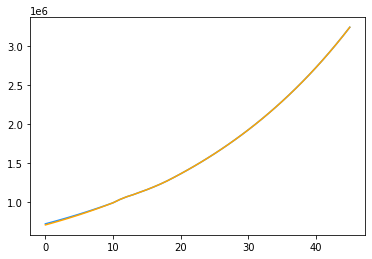

In [1607]:
growth_rates = circ_econ.array_waso_waste_landfill[1:]/circ_econ.array_waso_waste_landfill[0:-1] - 1
mu = np.mean(growth_rates, axis = 0)






array_test = np.concatenate([back_project_array(circ_econ.array_waso_waste_landfill, 10, 10), circ_econ.array_waso_waste_landfill])
array_test2 = np.concatenate([back_project_array(circ_econ.array_waso_waste_landfill, 10, 100), circ_econ.array_waso_waste_landfill])

ind = 0
plt.plot(array_test[:,ind], color = "dodgerblue")
plt.plot(array_test2[:,ind], color = "orange")
plt.show()

In [1534]:
#importlib.reload(ma)
#importlib.reload(sa)
sa.model_attributes.get_scalar(circ_econ.modvar_waso_emissions_n2o_incineration, "total")
out[[x for x in out.columns if "incinerated" in x]]

,qty_waso_incinerated_chemical_industrial_tonne,qty_waso_incinerated_food_tonne,qty_waso_incinerated_glass_tonne,qty_waso_incinerated_metal_tonne,qty_waso_incinerated_nappies_tonne,qty_waso_incinerated_other_tonne,qty_waso_incinerated_paper_tonne,qty_waso_incinerated_plastic_tonne,qty_waso_incinerated_rubber_leather_tonne,qty_waso_incinerated_sludge_tonne,qty_waso_incinerated_textiles_tonne,qty_waso_incinerated_wood_tonne,qty_waso_incinerated_yard_tonne,frac_waso_isw_incinerated_recovered_for_energy,frac_waso_msw_incinerated_recovered_for_energy
0,156265.270889,89177.795934,4810.103719,3588.490076,1553.175804,10790.484533,19087.713171,18324.204644,458.105116,1300.966269,2977.683255,229.052558,2519.578139,8224.487942,8148.281748
1,162900.278426,90296.220036,4884.208347,3643.774481,1571.171934,10915.510279,19436.456419,18606.507989,465.162700,1343.439961,3012.184677,231.925223,2551.177450,8573.698865,8260.933658
2,168434.296877,91357.044616,4951.981908,3694.335709,1588.516117,11036.006708,19747.514448,18864.692982,471.617325,1381.369370,3045.436215,234.649943,2581.149377,8864.962994,8366.016564
3,172870.830972,92359.963132,5013.628260,3740.325844,1605.176058,11151.749457,20022.392713,19099.536227,477.488406,1414.789287,3077.375952,237.225933,2609.485260,9098.464788,8463.638765
4,177925.794291,93331.521998,5075.355034,3786.375978,1621.102219,11262.394365,20304.795147,19334.685843,483.367146,1450.538288,3107.908918,239.721375,2636.935125,9364.515489,8559.721128
5,182936.601819,94275.309203,5135.449304,3831.208211,1636.561267,11369.794062,20580.303040,19563.616396,489.090410,1486.076714,3137.546352,242.145486,2663.600346,9628.242201,8653.194778
6,188452.593251,95207.711702,5196.202764,3876.532220,1651.688887,11474.891217,20863.698287,19795.058147,494.876454,1523.644367,3166.548390,244.540355,2689.943909,9918.557540,8746.596668
7,194325.345573,96124.081285,5256.931341,3921.837667,1666.450966,11577.448815,21150.558756,20026.405109,500.660128,1562.618286,3194.849625,246.894044,2715.834488,10227.649767,8839.187922
8,200808.682608,97031.602650,5318.603373,3967.846961,1680.911880,11677.914111,21447.131577,20261.346182,506.533655,1604.013482,3222.573480,249.225007,2741.475075,10568.878032,8932.061970
9,207910.040461,97930.127056,5381.147008,4014.506498,1695.076966,11776.324187,21752.939745,20499.607649,512.490191,1647.833014,3249.730188,251.532861,2766.861466,10942.633708,9025.167202


In [1512]:



"""
vec_waso_cat_attr_dry_matter_content_as_fraction_wet_weight = self.model_attributes.get_ordered_category_attribute("Solid Waste", "dry_matter_content_as_fraction_wet_weight")
vec_waso_cat_attr_doc_content_as_fraction_wet_waste = self.model_attributes.get_ordered_category_attribute("Solid Waste", "doc_content_as_fraction_wet_waste")
vec_waso_cat_attr_doc_content_as_fraction_dry_waste = self.model_attributes.get_ordered_category_attribute("Solid Waste", "doc_content_as_fraction_dry_waste")
vec_waso_cat_attr_docf_degradable = self.model_attributes.get_ordered_category_attribute("Solid Waste", "docf_degradable")
vec_waso_cat_attr_total_carbon_content_as_fraction_dry_weight = self.model_attributes.get_ordered_category_attribute("Solid Waste", "total_carbon_content_as_fraction_dry_weight")
vec_waso_cat_attr_fossil_carbon_fraction_as_fraction_total_carbon = self.model_attributes.get_ordered_category_attribute("Solid Waste", "fossil_carbon_fraction_as_fraction_total_carbon")

"""
#sa.model_attributes.get_attribute_table("Solid Waste").table

out[[x for x in out.columns if ("incineration" in x)]]


,emission_co2e_ch4_waso_incineration,emission_co2e_co2_waso_incineration,emission_co2e_n2o_waso_incineration
0,0.094290,0.300027,0.000032
1,0.096908,0.311250,0.000033
2,0.099157,0.320680,0.000034
3,0.101040,0.328326,0.000034
4,0.103095,0.336938,0.000035
5,0.105122,0.345462,0.000036
6,0.107296,0.354783,0.000036
7,0.109571,0.364661,0.000037
8,0.112027,0.375503,0.000038
9,0.114665,0.387321,0.000039


In [1497]:
out[[x for x in out.columns if "emission_co2e" in x]]

,emission_co2e_ch4_trww_treated_aerobic_treatment,emission_co2e_ch4_trww_treated_anaerobic_treatment,emission_co2e_ch4_trww_treated_latrine_improved_treatment,emission_co2e_ch4_trww_treated_latrine_unimproved_treatment,emission_co2e_ch4_trww_treated_septic_treatment,emission_co2e_ch4_trww_untreated_no_sewerage_treatment,emission_co2e_ch4_trww_untreated_with_sewerage_treatment,emission_co2e_n2o_trww_treated_aerobic_effluent,emission_co2e_n2o_trww_treated_anaerobic_effluent,emission_co2e_n2o_trww_treated_latrine_improved_effluent,...,emission_co2e_n2o_trww_untreated_with_sewerage_treatment,emission_co2e_ch4_waso_biogas_food,emission_co2e_ch4_waso_biogas_yard,emission_co2e_ch4_waso_compost_food,emission_co2e_ch4_waso_compost_yard,emission_co2e_n2o_waso_compost_food,emission_co2e_n2o_waso_compost_yard,emission_co2e_co2_waso_incineration,emission_co2e_n2o_waso_incineration,emission_co2e_subsector_total_trww
0,0.011740,0.221251,0.180068,0.030011,0.0,0.165938,0.0,0.013015,0.013015,0.025669,...,0.029315,0.000039,0.000001,0.008578,0.000242,0.005301,0.000150,0.300027,0.008682,0.883715
1,0.012123,0.228474,0.183358,0.030560,0.0,0.169442,0.0,0.013423,0.013423,0.026150,...,0.030083,0.000040,0.000001,0.008685,0.000245,0.005367,0.000152,0.311250,0.008935,0.905204
2,0.012466,0.234925,0.186195,0.031033,0.0,0.172298,0.0,0.013784,0.013784,0.026546,...,0.030746,0.000040,0.000001,0.008787,0.000248,0.005431,0.000153,0.320680,0.009152,0.923644
3,0.012767,0.240608,0.188599,0.031433,0.0,0.174525,0.0,0.014099,0.014099,0.026860,...,0.031305,0.000041,0.000001,0.008884,0.000251,0.005490,0.000155,0.328326,0.009334,0.939108
4,0.013090,0.246688,0.191113,0.031852,0.0,0.176986,0.0,0.014423,0.014423,0.027168,...,0.031876,0.000041,0.000001,0.008977,0.000254,0.005548,0.000157,0.336938,0.009533,0.955482
5,0.013411,0.252732,0.193548,0.032258,0.0,0.179362,0.0,0.014737,0.014737,0.027449,...,0.032421,0.000042,0.000001,0.009068,0.000256,0.005604,0.000158,0.345462,0.009729,0.971388
6,0.013750,0.259121,0.196082,0.032680,0.0,0.181930,0.0,0.015060,0.015060,0.027728,...,0.032980,0.000042,0.000001,0.009158,0.000259,0.005659,0.000160,0.354783,0.009940,0.988100
7,0.014101,0.265749,0.198662,0.033110,0.0,0.184612,0.0,0.015386,0.015386,0.027998,...,0.033539,0.000042,0.000001,0.009246,0.000261,0.005714,0.000161,0.364661,0.010162,1.005246
8,0.014475,0.272789,0.201362,0.033560,0.0,0.187527,0.0,0.015722,0.015722,0.028268,...,0.034116,0.000043,0.000001,0.009333,0.000264,0.005768,0.000163,0.375503,0.010401,1.023381
9,0.014870,0.280241,0.204174,0.034029,0.0,0.190674,0.0,0.016069,0.016069,0.028537,...,0.034709,0.000043,0.000001,0.009420,0.000266,0.005821,0.000164,0.387321,0.010659,1.042479


In [1360]:
arr1 = np.array([[1.0, 1.0001, 0.999, 1.1], [0.8, 1.0004, 1.00005, 1], [0.6, 5, 5, 1]])
arr2 = np.array([[0.16, 0.12], [-0.91, 0.03], [0.72, -0.63]])

cols = np.array([1, 3])
rows = np.arange(len(arr1))
inds = np.repeat([cols], len(arr1), axis = 0)
#arr2.flatten(order = "C")
#p.put_along_axis(arr1, )
np.put_along_axis(arr1, inds, arr2, axis = 1)
arr1

array([[ 1.     ,  0.16   ,  0.999  ,  0.12   ],
       [ 0.8    , -0.91   ,  1.00005,  0.03   ],
       [ 0.6    ,  0.72   ,  5.     , -0.63   ]])

In [1229]:
arr1 = np.array([[1.0, 1.0001, 0.999, 1.1], [0.8, 1.0004, 1.00005, 1]])
w = np.where((arr1 <= 1 + 0.001) & (arr1 > 1))
inds = w[0]*len(arr1[0]) + w[1]
np.put(arr1, inds, arr1[w[0], w[1]].flatten()/arr1[w[0], w[1]].flatten())# arr1[inds].flatten()/arr1[inds].flatten())
arr1

array([[1.   , 1.   , 0.999, 1.1  ],
       [0.8  , 1.   , 1.   , 1.   ]])

In [310]:
circ_econ.vars_wali_to_trww
#sa.model_attributes.dict_varreqs["category_ce_wali"].field_maps["variable_to_cat_wastewater_treatment"]

['Treatment Fraction Aerobic',
 'Treatment Fraction Anaerobic',
 'Treatment Fraction Improved Latrine',
 'Treatment Fraction Unimproved Latrine',
 'Treatment Fraction Septic',
 'Treatment Fraction Untreated No Sewerage',
 'Treatment Fraction Untreated With Sewerage']

In [311]:
sa.model_attributes.get_ordered_vars_by_nonprimary_category("Liquid Waste", "Wastewater Treatment", "key_varreqs_all")

['Treatment Fraction Aerobic',
 'Treatment Fraction Anaerobic',
 'Treatment Fraction Improved Latrine',
 'Treatment Fraction Unimproved Latrine',
 'Treatment Fraction Septic',
 'Treatment Fraction Untreated No Sewerage',
 'Treatment Fraction Untreated With Sewerage']

<AxesSubplot:>

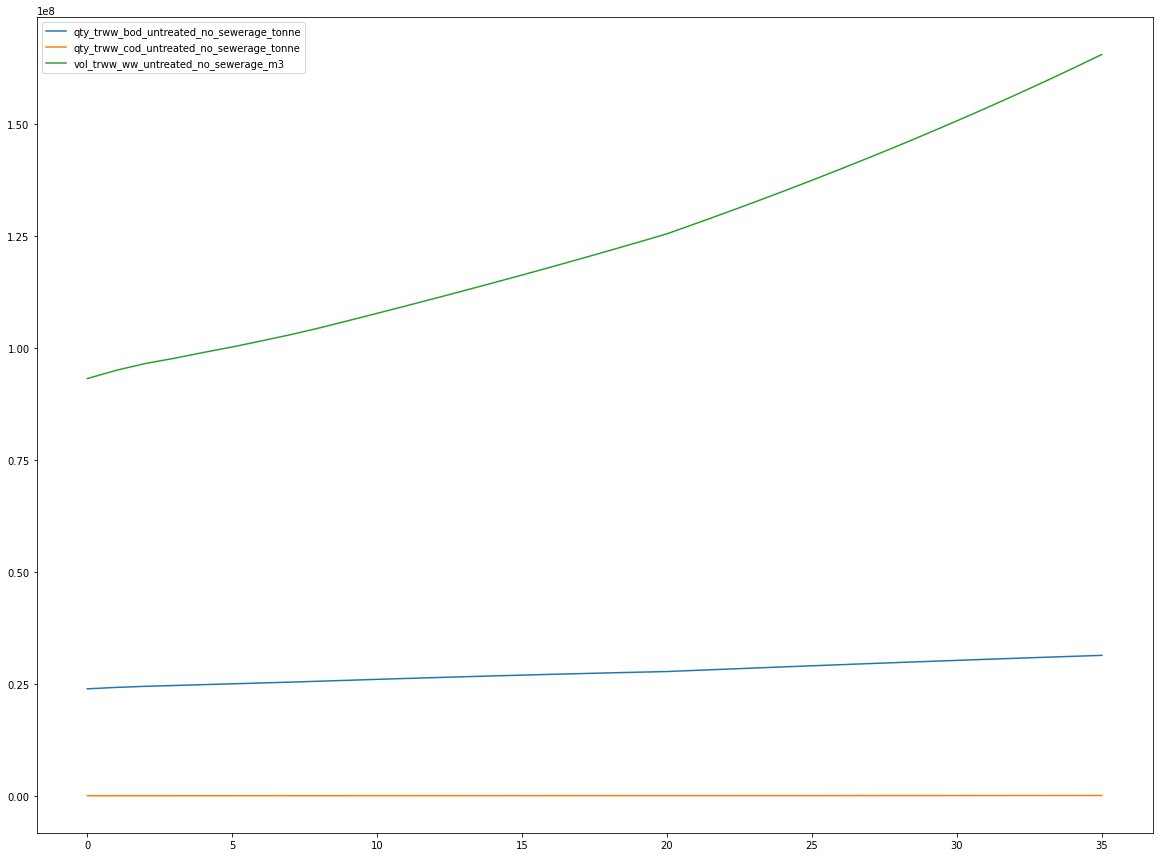

In [317]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20, 15))
#out.plot(ax = ax)#[[x for x in out.columns if "latrine_improved" in x]].plot(ax = ax)

out[[x for x in out.columns if "no_sewerage" in x]].plot(ax = ax)


In [227]:
#sa.model_attributes.get_standard_variables(df_waste, "Population", False, return_type = "array_base")
#sa.model_attributes.build_varlist("Liquid Waste", "Treatment Fraction Aerobic", ["ww_domestic_rural"])

def check_row_sums(
    array: np.ndarray, 
    sum_restriction: float = 1, 
    thresh_correction: float = 0.001,
    msg_pass: str = ""
):
    sums = array.sum(axis = 1)
    max_diff = np.max(np.abs(sums - sum_restriction))
    if max_diff > thresh_correction:
        raise ValueError(f"Invalid row sums in array{msg_pass}. The maximum deviance is {max_diff}, which is greater than the threshold for correction.")
    else:
        return (array.transpose()/sums).transpose()

    
check_row_sums(np.array(out)*2)

ValueError: Invalid row sums in array. The maximum deviance is 1.0, which is greater than the threshold for correction.

In [43]:




    
circ_econ.check_df_fields(df_waste)





In [ ]:
#########################
###                   ###
###    SOLID WASTE    ###
###                   ###
#########################


##   ESTIMATE WASTE GENERATED BY CATEGORY


##################################
#    RECYCLING AND COMPOSTING    #
##################################


##   ESTIMATE TOTAL WASTE RECYLCED + COMPOSTED/BIOGAS


##   FOR WASTE THAT IS RECYCLED, GET TOTALS TO SEND TO IPPU FOR PROCESS EMISSIONS


##   FOR COMPOST/BIOGAS, ESTIMATE EMISSIONS AND GET TOTAL BIOGAS AVAILABLE AS A FUEL


###################
#    LANDFILLS    #
###################

##   ESTIMATE TOTAL WASTE THAT IS LANDFILLED


##   ESTIMATE EMISSIONS USING FIRST-ORDER DECAY MODEL


##   ESTIMATE LANDFILL GAS (METHANE) THAT IS CAPTURED


##   ESTIMATE MASS OF LANDFILL GAS THAT IS AVAILABLE AS FUEL 



#######################################
#    INCINERATION AND OPEN BURNING    #
#######################################

##  TOTAL WASTE OPEN BURNED


##  EMISSIONS FROM OPEN BURNING


##  FRACTION OF 




##########################
#    UNCOLLECTED WASTE   #
##########################

##  TOTAL WASTE UNCOLLECTED


##  



########################################################################
#    INCREASED TRANSPORTATION DEMAND FOR HEAVY TRUCKS FOR COLLECTION   #
########################################################################

# GET VMT PER CAPITA




In [29]:
importlib.reload(sa)

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python


<module 'setup_analysis' from '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/setup_analysis.py'>

0.9527145359019265